# Machine Learning Engineer Nanodegree
   # Capaston Project: Machine Learning in The Education Process

----
## Exploring the Data
The First data set was originally used in a research done at the University of Minho, Portugal (Cortez and Silva, 2008). It contains information about 395 students has 33 different variables.
 [Link to dataset](https://www.kaggle.com/dipam7/student-grade-prediction)

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
# Load the Census dataset
data = pd.read_csv("student-mat.csv")
print ("Student Data read succefully !!")

display(data.head())
print('Total number of students:',len(data))

Student Data read succefully !!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Total number of students: 395


# Final grade (-G3-Our target) 

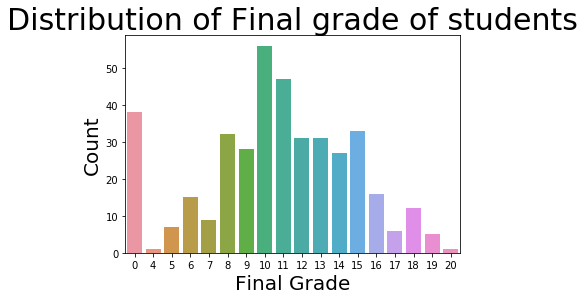

In [2]:
b = sns.countplot(data['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [3]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

## checking null values

In [4]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

### Histogram might be more useful to compare different ages family superviesed

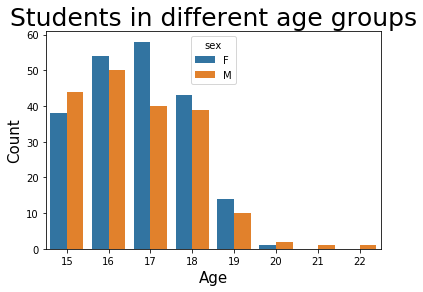

In [7]:
b = sns.countplot('age',hue='sex', data=data)
b.axes.set_title('Students in different age groups',fontsize=25)
b.set_xlabel("Age",fontsize=15)
b.set_ylabel("Count",fontsize=15)
plt.show()

## Visualize Feature Distributions & Correlation

C:\Users\Shady\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


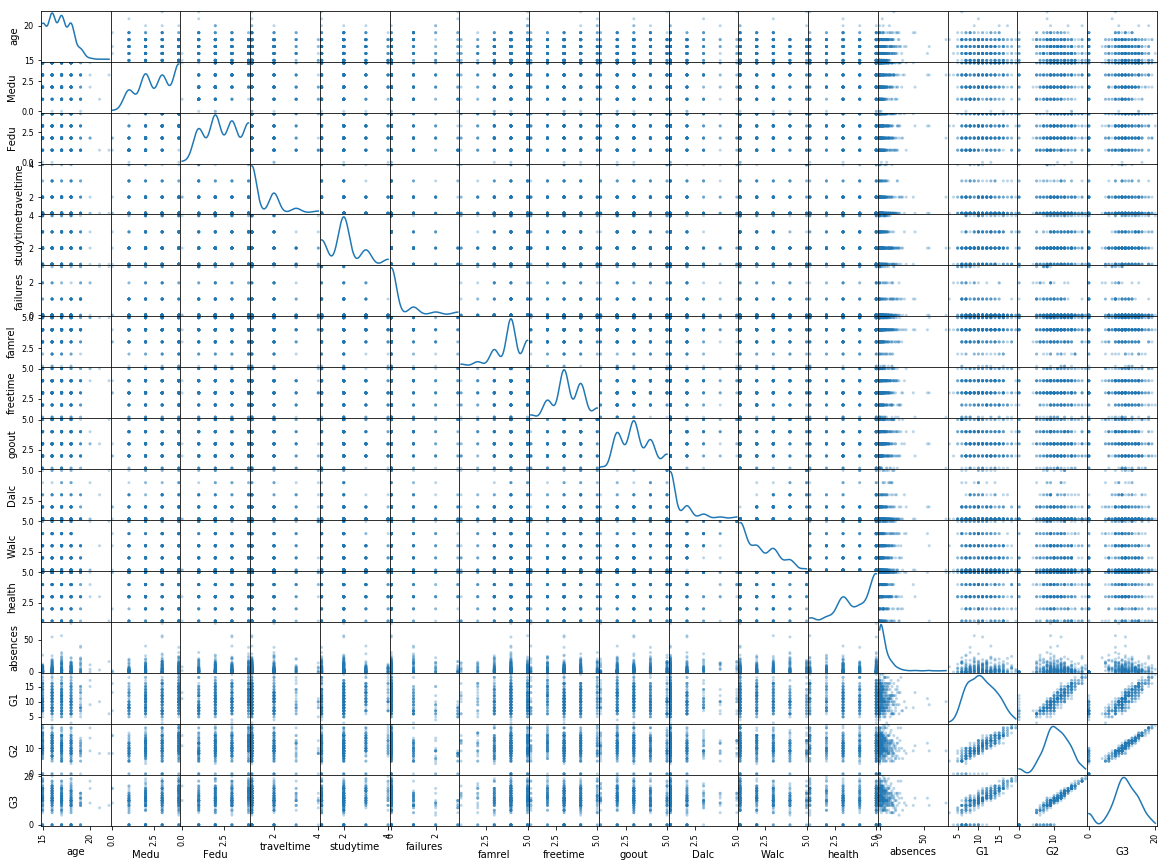

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,15), diagonal = 'kde');

Next we find the correlation between various features and G3.
 
### Note: This correlation is only between numeric values

In [9]:
df = pd.DataFrame(data)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1,-0.163658,-0.163438,0.0706407,-0.00414004,0.243665,0.0539401,0.0164344,0.126964,0.131125,0.117276,-0.0621874,0.17523,-0.0640815,-0.143474,-0.161579
Medu,-0.163658,1,0.623455,-0.171639,0.0649441,-0.23668,-0.00391446,0.0308909,0.0640944,0.0198341,-0.0471235,-0.0468778,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1,-0.158194,-0.00917464,-0.250408,-0.00136973,-0.0128455,0.0431047,0.00238643,-0.012631,0.0147415,0.0244729,0.19027,0.164893,0.152457
traveltime,0.0706407,-0.171639,-0.158194,1,-0.100909,0.0922387,-0.016808,-0.0170249,0.0285397,0.138325,0.134116,0.00750061,-0.0129438,-0.09304,-0.153198,-0.117142
studytime,-0.00414004,0.0649441,-0.00917464,-0.100909,1,-0.173563,0.0397307,-0.143198,-0.0639037,-0.196019,-0.253785,-0.0756159,-0.0627002,0.160612,0.13588,0.0978197
failures,0.243665,-0.23668,-0.250408,0.0922387,-0.173563,1,-0.0443366,0.0919875,0.124561,0.136047,0.141962,0.0658273,0.0637258,-0.354718,-0.355896,-0.360415
famrel,0.0539401,-0.00391446,-0.00136973,-0.016808,0.0397307,-0.0443366,1,0.150701,0.0645684,-0.0775944,-0.113397,0.0940557,-0.0443541,0.0221683,-0.0182813,0.0513634
freetime,0.0164344,0.0308909,-0.0128455,-0.0170249,-0.143198,0.0919875,0.150701,1,0.285019,0.209001,0.147822,0.0757334,-0.0580779,0.0126129,-0.0137771,0.0113072
goout,0.126964,0.0640944,0.0431047,0.0285397,-0.0639037,0.124561,0.0645684,0.285019,1,0.266994,0.420386,-0.00957725,0.0443022,-0.149104,-0.16225,-0.132791
Dalc,0.131125,0.0198341,0.00238643,0.138325,-0.196019,0.136047,-0.0775944,0.209001,0.266994,1,0.647544,0.0771796,0.111908,-0.0941588,-0.0641202,-0.05466


## Implementation: 
### Data Preparation
- no null values
- tranformation
From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. 

## Applying one hot encoding


### Note: 
Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

In [10]:
# G3 our target
labels = data['G3']

# drop 'school', 'G1'and'G2' columns .It is more difficult to predict G3 without G2 and G1
student = data.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)
# Print the number of features after one-hot encoding
encoded = list(student.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
# Uncomment the following line to see the encoded feature names
print (encoded)

55 total features after one-hot encoding.
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']


In [11]:
# Find correlations with the Grade
most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

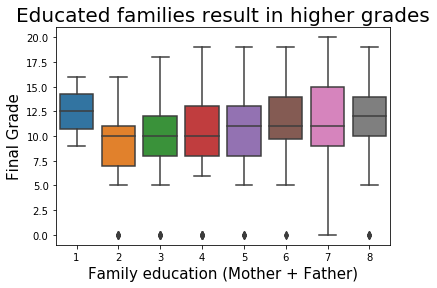

In [12]:
family_ed = student['Fedu'] + student['Medu'] 
b = sns.boxplot(x=family_ed,y=student['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 20)
b.set_xlabel('Family education (Mother + Father)', fontsize = 15)
b.set_ylabel('Final Grade', fontsize = 15)
plt.show()

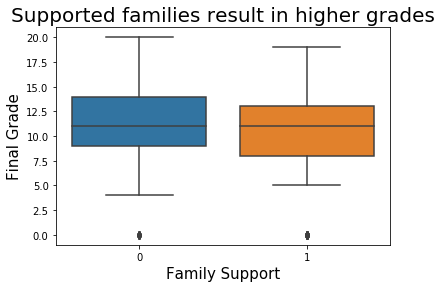

In [13]:
family_support= student['famsup_yes']
b = sns.boxplot(x=family_support,y=student['G3'])
b.axes.set_title('Supported families result in higher grades', fontsize = 20)
b.set_xlabel('Family Support', fontsize = 15)
b.set_ylabel('Final Grade', fontsize = 15)
plt.show()

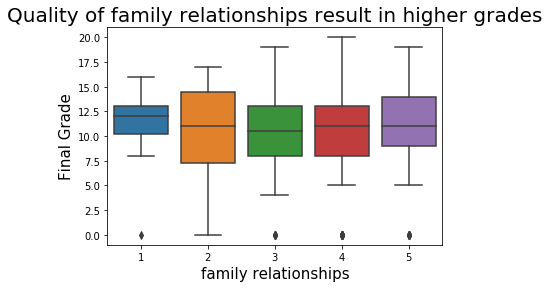

In [14]:
family_relationships = student['famrel']
b = sns.boxplot(x=family_relationships,y=student['G3'])
b.axes.set_title('Quality of family relationships result in higher grades', fontsize = 20)
b.set_xlabel('family relationships', fontsize = 15)
b.set_ylabel('Final Grade', fontsize = 15)
plt.show()

In [15]:
display(student.head())

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [16]:
student['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [17]:
# Import train_test_split
from sklearn.model_selection import train_test_split
student = student.drop(['G3'], axis='columns')
# Split the 'features' and 'G3' data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(student,labels,test_size = 0.2,random_state = 0)

#  Data only for family feature
df2=pd.DataFrame(student)
student2=df2[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'goout','health', 'absences', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'internet_no', 'internet_yes']]

# Split the 'features' and 'G3' data into training and testing sets for family data
X_train2, X_test2, y_train2, y_test2 = train_test_split(student2,labels,test_size = 0.2,random_state = 0)


# Show the results of the split
print("Training set has {} samples.".format(X_train1.shape[0]))
print("Testing set has {} samples.".format(X_test1.shape[0]))

Training set has 316 samples.
Testing set has 79 samples.


## Import ML Models & Evaluation Metrics

In [18]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error


# Distributions
import scipy

## Modeling

In [19]:
# Evaluate several ml models by training on training set and testing on testing set


def evaluate(X_train, X_test, y_train, y_test):
    
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression','Random Forest', 'Extra Trees','Gradient Boosted', 'GaussianNB','SVM','Neural Network']
      
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = GradientBoostingRegressor(n_estimators=50)
    model6 = GaussianNB()
    model7 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model8 = MLPRegressor(activation='logistic')

    # Dataframe for results
    results = pd.DataFrame(columns=['rmse','time_period'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6, model7, model8]):
        start = time() 
        model.fit(X_train, y_train)
        end = time()
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)
        
        
        # Metrics
  
        rmse = np.sqrt(np.mean((predictions_test - y_test) ** 2))
        time_period = end-start
    
        model_name = model_name_list[i]
       
        results.loc[model_name, :] = [rmse,time_period]
    
    return results

## Run evaluate function code with full dataset

In [20]:
results1 = evaluate(X_train1, X_test1, y_train1, y_test1)
results1

C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,rmse,time_period
Linear Regression,4.71209,0.0160007
ElasticNet Regression,5.05117,0.00200009
Random Forest,4.55309,0.247014
Extra Trees,4.788,0.264015
Gradient Boosted,4.5004,0.0340021
GaussianNB,6.91998,0.00300026
SVM,4.99667,0.00900054
Neural Network,5.06312,0.466027


## Run evaluate function code with only family features dataset

In [21]:
results2 = evaluate(X_train2, X_test2, y_train2, y_test2)
results2

C:\Users\Shady\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,rmse,time_period
Linear Regression,5.25057,0.0500031
ElasticNet Regression,5.19088,0.00200009
Random Forest,4.79895,0.210012
Extra Trees,5.25814,0.210012
Gradient Boosted,5.06596,0.0280015
GaussianNB,8.09829,0.00300002
SVM,5.08105,0.00800037
Neural Network,5.17194,0.391023


## merging & Visualizing Results 

In [22]:
All_results = pd.merge(results1, results2,right_index=True, left_index=True)
All_results


,rmse_x,time_period_x,rmse_y,time_period_y
Linear Regression,4.71209,0.0160007,5.25057,0.0500031
ElasticNet Regression,5.05117,0.00200009,5.19088,0.00200009
Random Forest,4.55309,0.247014,4.79895,0.210012
Extra Trees,4.788,0.264015,5.25814,0.210012
Gradient Boosted,4.5004,0.0340021,5.06596,0.0280015
GaussianNB,6.91998,0.00300026,8.09829,0.00300002
SVM,4.99667,0.00900054,5.08105,0.00800037
Neural Network,5.06312,0.466027,5.17194,0.391023


In [23]:
All_results.rename(columns={"rmse_x": "RMSE_All_Data", "time_period_x": "Time_All_Data","rmse_y": "RMSE_Family_Data", "time_period_y": "Time_Family_Data"}, inplace = True)
All_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Linear Regression to Neural Network
Data columns (total 4 columns):
RMSE_All_Data       8 non-null object
Time_All_Data       8 non-null object
RMSE_Family_Data    8 non-null object
Time_Family_Data    8 non-null object
dtypes: object(4)
memory usage: 320.0+ bytes


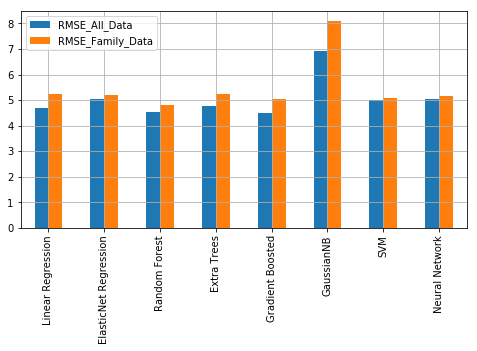

In [24]:
All_results.plot.bar(y=['RMSE_All_Data', 'RMSE_Family_Data'], figsize=(8,4), grid=True)

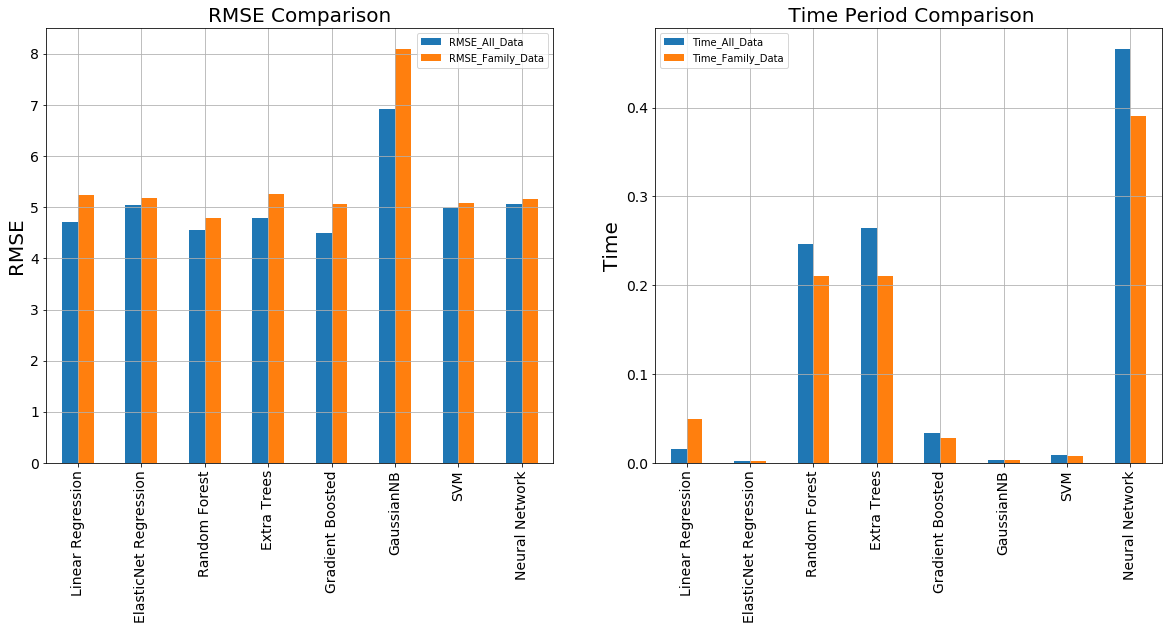

In [25]:

plt.figure(figsize=(20, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
All_results.plot.bar(y=['RMSE_All_Data', 'RMSE_Family_Data'],ax = ax, grid=True,fontsize=14)
plt.title('RMSE Comparison', fontsize=20) 
plt.ylabel('RMSE', fontsize=20)

# Time Period
ax = plt.subplot(1, 2, 2)
All_results.plot.bar(y=['Time_All_Data', 'Time_Family_Data'],ax = ax, grid=True,fontsize=14)
plt.title(' Time Period Comparison', fontsize=20) 
plt.ylabel('Time',fontsize=20)
plt.show()